In [1]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('cashflowforecast.csv')

In [3]:
df.head()

,Month,Cashflow at the end
0,2012.03.31,"26,731,441"
1,2012.09.30,"71,994,170"
2,2012.12.31,"108,633,183"
3,2013.03.31,"186,053,544"
4,2013.06.30,"202,489,744"


In [4]:
df.tail()

,Month,Cashflow at the end
19,2017.03.31,"1,024,654,683"
20,2017.06.30,"1,083,800,732"
21,2017.09.30,"606,937,593"
22,2017.12.31,"1,341,262,558"
23,2018.03.31,"1,008,737,712"


In [5]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [6]:
df.head()

,Month,Cashflow at the end
0,2012-03-31,"26,731,441"
1,2012-09-30,"71,994,170"
2,2012-12-31,"108,633,183"
3,2013-03-31,"186,053,544"
4,2013-06-30,"202,489,744"


In [7]:
df.set_index('Month',inplace=True)

In [8]:
df.head()

,Cashflow at the end
Month,
2012-03-31,"26,731,441"
2012-09-30,"71,994,170"
2012-12-31,"108,633,183"
2013-03-31,"186,053,544"
2013-06-30,"202,489,744"


In [9]:
df.describe()

,Cashflow at the end
count,24
unique,24
top,"26,731,441"
freq,1


In [10]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [11]:
column_types = df.dtypes

print(column_types)

Cashflow at the end    object
dtype: object


In [12]:
# Remove commas and convert 'Cashflow at the end' column to float
df['Cashflow at the end'] = df['Cashflow at the end'].str.replace(',', '').astype(float)

# Check the data types
print(df.dtypes)

Cashflow at the end    float64
dtype: object


In [13]:
##Visualize the data

<Axes: xlabel='Month'>

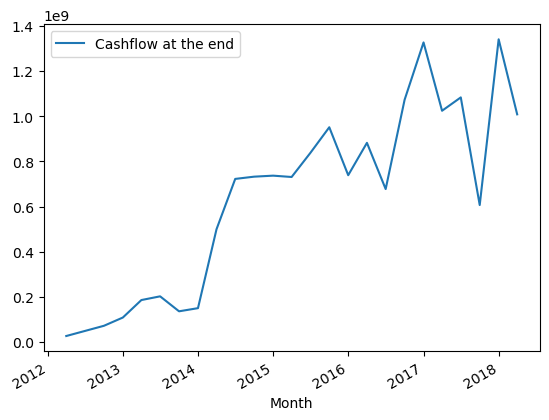

In [14]:
df.plot()

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(df['Cashflow at the end'])

In [17]:
#Ho: It is non stationary
#H1: It is stationary

# Function to perform ADF test
def adfuller_test(series):
    result = adfuller(series)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

# Perform ADF test on 'Cashflow at the end' column
adfuller_test(df['Cashflow at the end'])

ADF Test Statistic : -2.498823731482339
p-value : 0.11576078597728162
#Lags Used : 9
Number of Observations Used : 14
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [18]:
##Diferencing

In [19]:
df['Cashflow First Difference'] = df['Cashflow at the end'] - df['Cashflow at the end'].shift(1)

In [20]:
df['Cashflow at the end'].shift(1)

Month
2012-03-31             NaN
2012-09-30    2.673144e+07
2012-12-31    7.199417e+07
2013-03-31    1.086332e+08
2013-06-30    1.860535e+08
2013-09-30    2.024897e+08
2013-12-31    1.361836e+08
2014-03-31    1.501164e+08
2014-06-30    4.995680e+08
2014-09-30    7.227099e+08
2014-12-31    7.326602e+08
2015-03-31    7.371194e+08
2015-06-30    7.312055e+08
2015-09-30    8.378353e+08
2015-12-31    9.515686e+08
2016-03-31    7.391471e+08
2016-06-30    8.825059e+08
2016-09-30    6.777703e+08
2016-12-31    1.073273e+09
2017-03-31    1.327298e+09
2017-06-30    1.024655e+09
2017-09-30    1.083801e+09
2017-12-31    6.069376e+08
2018-03-31    1.341263e+09
Name: Cashflow at the end, dtype: float64

In [21]:
df['Seasonal First Difference']=df['Cashflow at the end']-df['Cashflow at the end'].shift(12)

In [22]:
df.head(14)

,Cashflow at the end,Cashflow First Difference,Seasonal First Difference
Month,,,
2012-03-31,26731441.0,NaN,NaN
2012-09-30,71994170.0,45262729.0,NaN
2012-12-31,108633183.0,36639013.0,NaN
2013-03-31,186053544.0,77420361.0,NaN
2013-06-30,202489744.0,16436200.0,NaN
2013-09-30,136183650.0,-66306094.0,NaN
2013-12-31,150116369.0,13932719.0,NaN
2014-03-31,499567951.0,349451582.0,NaN
2014-06-30,722709860.0,223141909.0,NaN


In [23]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : 8.33690590539128
p-value : 1.0
#Lags Used : 4
Number of Observations Used : 7
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


<Axes: xlabel='Month'>

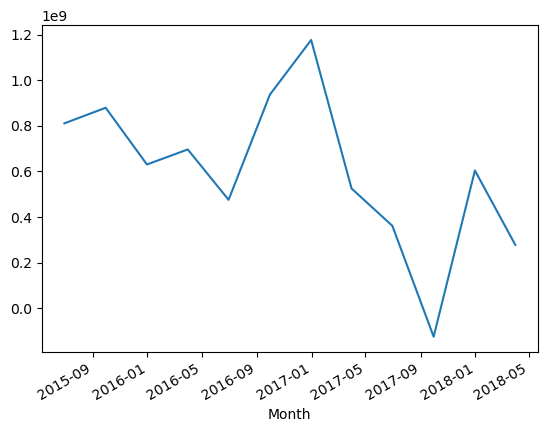

In [24]:
df['Seasonal First Difference'].plot()

In [25]:
##Auto Regressive model

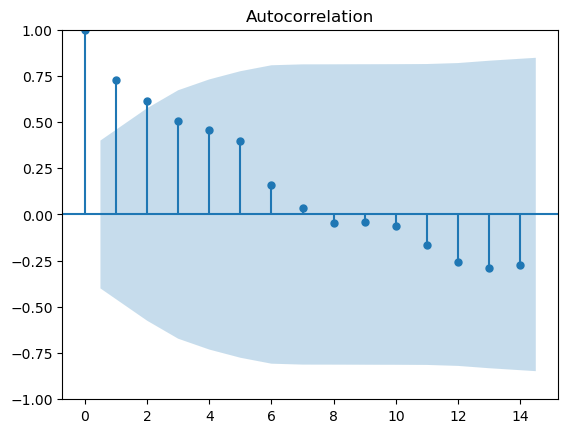

In [26]:
# Plot autocorrelation
plot_acf(df['Cashflow at the end'])
plt.show()

In [27]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install pandas statsmodels matplotlib


Note: you may need to restart the kernel to use updated packages.


In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [31]:
import statsmodels.api as sm

D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


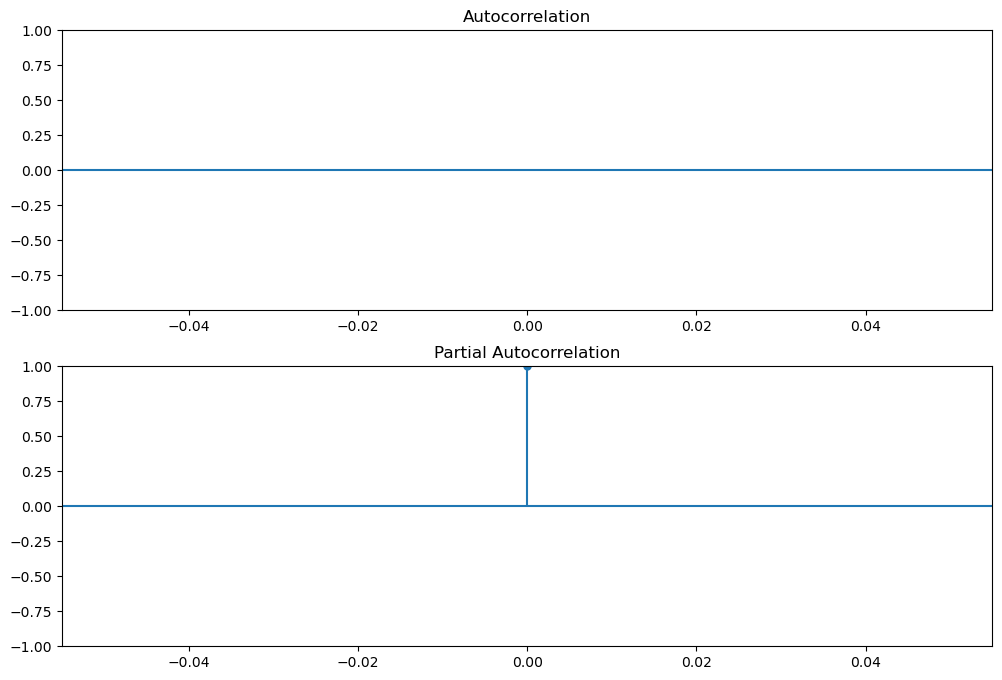

In [34]:

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[1:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[1:],lags=10,ax=ax2)





In [35]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [38]:
pip install --upgrade statsmodels


     ---------------------------------------- 9.2/9.2 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Anaconda\\Lib\\site-packages\\~tatsmodels\\nonparametric\\linbin.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [41]:
# Fit ARIMA model
model = ARIMA(df['Cashflow at the end'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [42]:
model=ARIMA(df['Cashflow at the end'],order=(1,1,1))
model_fit=model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
